<a href="https://colab.research.google.com/github/YuxuanHuang455/week4-Monday-test/blob/main/Yuxuan_Huang_%E2%80%9CMini_hackthon_tutorial_on_AI_%26_Finance_for_Emerging_Markets_ipynb%E2%80%9D_copy_anxiety_and_depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊  Complete Financial Data Analysis with AutoML & Machine Learning Models
This is a Google Colab-compatible script that performs:

- ✅ Data fetching from Yahoo Finance
- ✅ Preprocessing & Feature Engineering
- ✅ High-quality visualizations (Nature/Science journal level)
- ✅ Automated Machine Learning (AutoML)
- ✅ Linear Regression with Statsmodels
- ✅ Comparing Multiple ML Models
- ✅ Learning Curve Analysis

### 🚀 **Google Colab Case Study: Financial Data Analysis & AutoML**

To use this script, copy and paste it into a Google Colab notebook and run each section step by step.

## 🔹 **1. Install & Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
url = "https://raw.githubusercontent.com/YuxuanHuang455/week4-Monday-test/refs/heads/main/share-who-report-lifetime-anxiety-or-depression/share-who-report-lifetime-anxiety-or-depression.csv"
df = pd.read_csv(url)
print(df.head())

      Entity Code  Year  \
0     Africa  NaN  2020   
1    Albania  ALB  2020   
2    Algeria  DZA  2020   
3  Argentina  ARG  2020   
4       Asia  NaN  2020   

   Share - Question: mh7a - Have been anxious/depressed - Answer: Yes - Gender: all - Age group: all  
0                                          19.692047                                                  
1                                          12.326020                                                  
2                                           7.659035                                                  
3                                          35.316630                                                  
4                                          16.018984                                                  


In [ ]:
share_col = 'Share - Question: mh7a - Have been anxious/depressed - Answer: Yes - Gender: all - Age group: all'
df = df.rename(columns={share_col: 'share_anx_dep'})
df_countries = df[~df['Code'].isna()].copy()

# 4) review
print({
    "rows_total": len(df),
    "rows_countries": len(df_countries),
    "year_unique": sorted(df_countries["Year"].unique().tolist()),
    "share_min": float(df_countries["share_anx_dep"].min()),
    "share_max": float(df_countries["share_anx_dep"].max()),
    "share_mean": float(df_countries["share_anx_dep"].mean()),
    "share_median": float(df_countries["share_anx_dep"].median()),
})


{'rows_total': 123, 'rows_countries': 113, 'year_unique': [2020], 'share_min': 2.933675, 'share_max': 49.34965, 'share_mean': 21.623407357522126, 'share_median': 19.77898}



Top 10:
                 Entity Code  Year  share_anx_dep
87                 Peru  PER  2020      49.349650
30              Ecuador  ECU  2020      42.695652
121              Zambia  ZMB  2020      40.395424
29   Dominican Republic  DOM  2020      38.433903
11              Bolivia  BOL  2020      38.380720
118           Venezuela  VEN  2020      38.228786
32          El Salvador  SLV  2020      38.135360
19                Chile  CHL  2020      37.285408
17             Cameroon  CMR  2020      36.331640
80            Nicaragua  NIC  2020      35.319600

Bottom 10:
         Entity Code  Year  share_anx_dep
105      Taiwan  TWN  2020       2.933675
52       Israel  ISR  2020       6.228855
16     Cambodia  KHM  2020       6.922305
73   Montenegro  MNE  2020       7.461375
2       Algeria  DZA  2020       7.659035
63    Lithuania  LTU  2020       7.794511
20        China  CHN  2020       8.565871
76      Namibia  NAM  2020       8.979812
97     Slovenia  SVN  2020       9.423891
54       

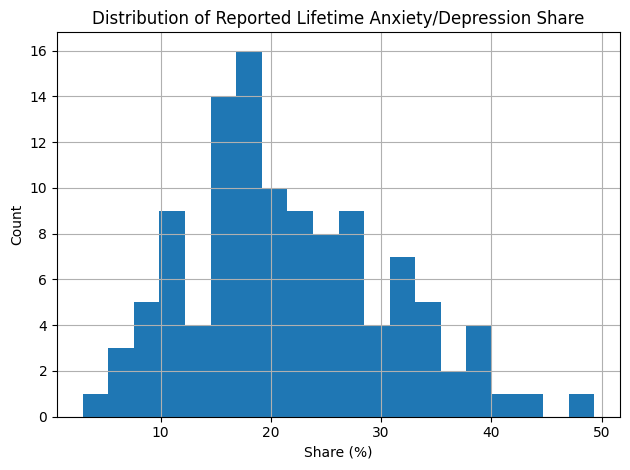

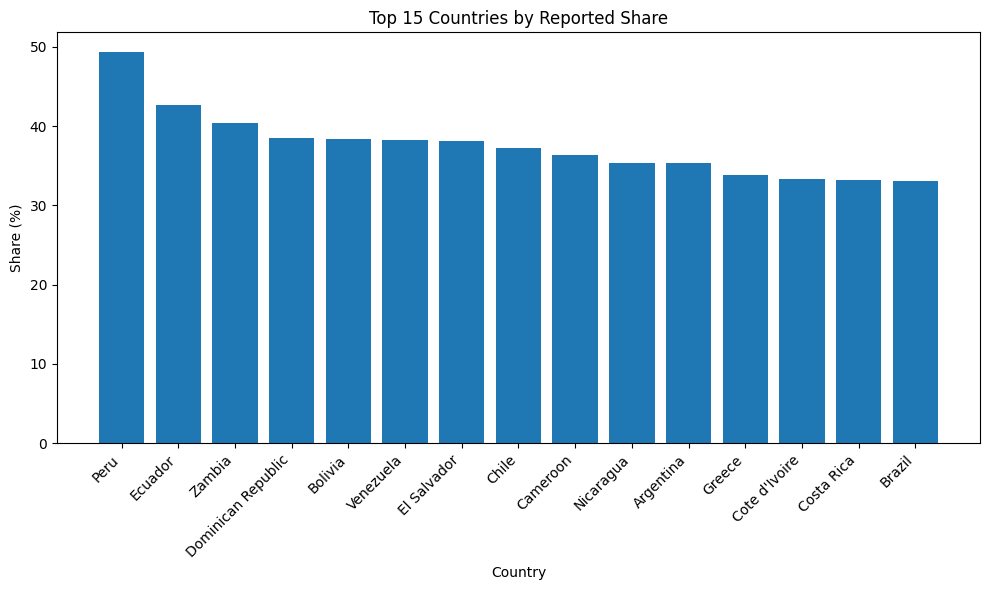


Saved: anxiety_depression_clusters.csv

Cluster counts:
cluster_label
Medium    52
Low       36
High      25
Name: count, dtype: int64


In [ ]:

# 5) Top / Bottom
top10 = df_countries.sort_values("share_anx_dep", ascending=False).head(10)
bottom10 = df_countries.sort_values("share_anx_dep", ascending=True).head(10)
print("\nTop 10:")
print(top10[["Entity","Code","Year","share_anx_dep"]])
print("\nBottom 10:")
print(bottom10[["Entity","Code","Year","share_anx_dep"]])

# 6) matplotlib-only
plt.figure()
df_countries["share_anx_dep"].hist(bins=20)
plt.title("Distribution of Reported Lifetime Anxiety/Depression Share")
plt.xlabel("Share (%)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
top15 = df_countries.sort_values("share_anx_dep", ascending=False).head(15)
plt.bar(top15["Entity"], top15["share_anx_dep"])
plt.title("Top 15 Countries by Reported Share")
plt.xlabel("Country")
plt.ylabel("Share (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 7) Low/Medium/High
X = df_countries[["share_anx_dep"]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_countries["cluster"] = clusters

centers = kmeans.cluster_centers_.flatten()
order = np.argsort(centers)  # low -> high
label_map = {order[0]: "Low", order[1]: "Medium", order[2]: "High"}
df_countries["cluster_label"] = df_countries["cluster"].map(label_map)

# 8)
out_path = "anxiety_depression_clusters.csv"
df_countries[["Entity","Code","Year","share_anx_dep","cluster_label"]].to_csv(out_path, index=False)
print(f"\nSaved: {out_path}")

# 9)
print("\nCluster counts:")
print(df_countries["cluster_label"].value_counts())


## 🔹 **2. Fetch Financial Data from Yahoo Finance**

In [ ]:
url = "https://raw.githubusercontent.com/YuxuanHuang455/week4-Monday-test/refs/heads/main/share-who-report-lifetime-anxiety-or-depression/share-who-report-lifetime-anxiety-or-depression.csv"
df = pd.read_csv(url)

# 定位 share 列
share_col = 'Share - Question: mh7a - Have been anxious/depressed - Answer: Yes - Gender: all - Age group: all'
df = df.rename(columns={share_col: "Share"})

# 保留关键列
df = df[["Entity", "Code", "Year", "Share"]]
df = df[~df["Code"].isna()].copy()   # 去掉聚合区域
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Share"] = pd.to_numeric(df["Share"], errors="coerce")
df = df.dropna(subset=["Share"]).reset_index(drop=True)

print("\nStep 2: Cleaned DataFrame:\n", df.head())


Step 2: Cleaned DataFrame:
       Entity Code  Year      Share
0    Albania  ALB  2020  12.326020
1    Algeria  DZA  2020   7.659035
2  Argentina  ARG  2020  35.316630
3  Australia  AUS  2020  27.257576
4    Austria  AUT  2020  15.339011


## 🔹 **3. Compute Features (Moving Averages, Returns)**

In [ ]:
y = df["Share"]
df["Year"] = df["Year"].astype(int)
df["NameLength"] = df["Entity"].apply(len)
df["IsIsland"] = df["Entity"].str.contains("Islands", case=False).astype(int)
df["IsUnited"] = df["Entity"].str.contains("United", case=False).astype(int)
df["NameFirstLetterCode"] = df["Entity"].str[0].apply(lambda x: ord(x.upper()) - ord('A')).astype(int)
feature_cols = ["Year", "NameLength", "IsIsland", "IsUnited", "NameFirstLetterCode"]
X = df[feature_cols]
print("\nX：\n")
print(X.head())
print("\ny（Share）:\n")
print(y.head())


X：

   Year  NameLength  IsIsland  IsUnited  NameFirstLetterCode
0  2020           7         0         0                    0
1  2020           7         0         0                    0
2  2020           9         0         0                    0
3  2020           9         0         0                    0
4  2020           7         0         0                    0

y（Share）:

0    12.326020
1     7.659035
2    35.316630
3    27.257576
4    15.339011
Name: Share, dtype: float64


## 🔹 **4. High-Quality Visualization for Nature/Science Journal**
📊 (A) A：Top 20  bar plot
python


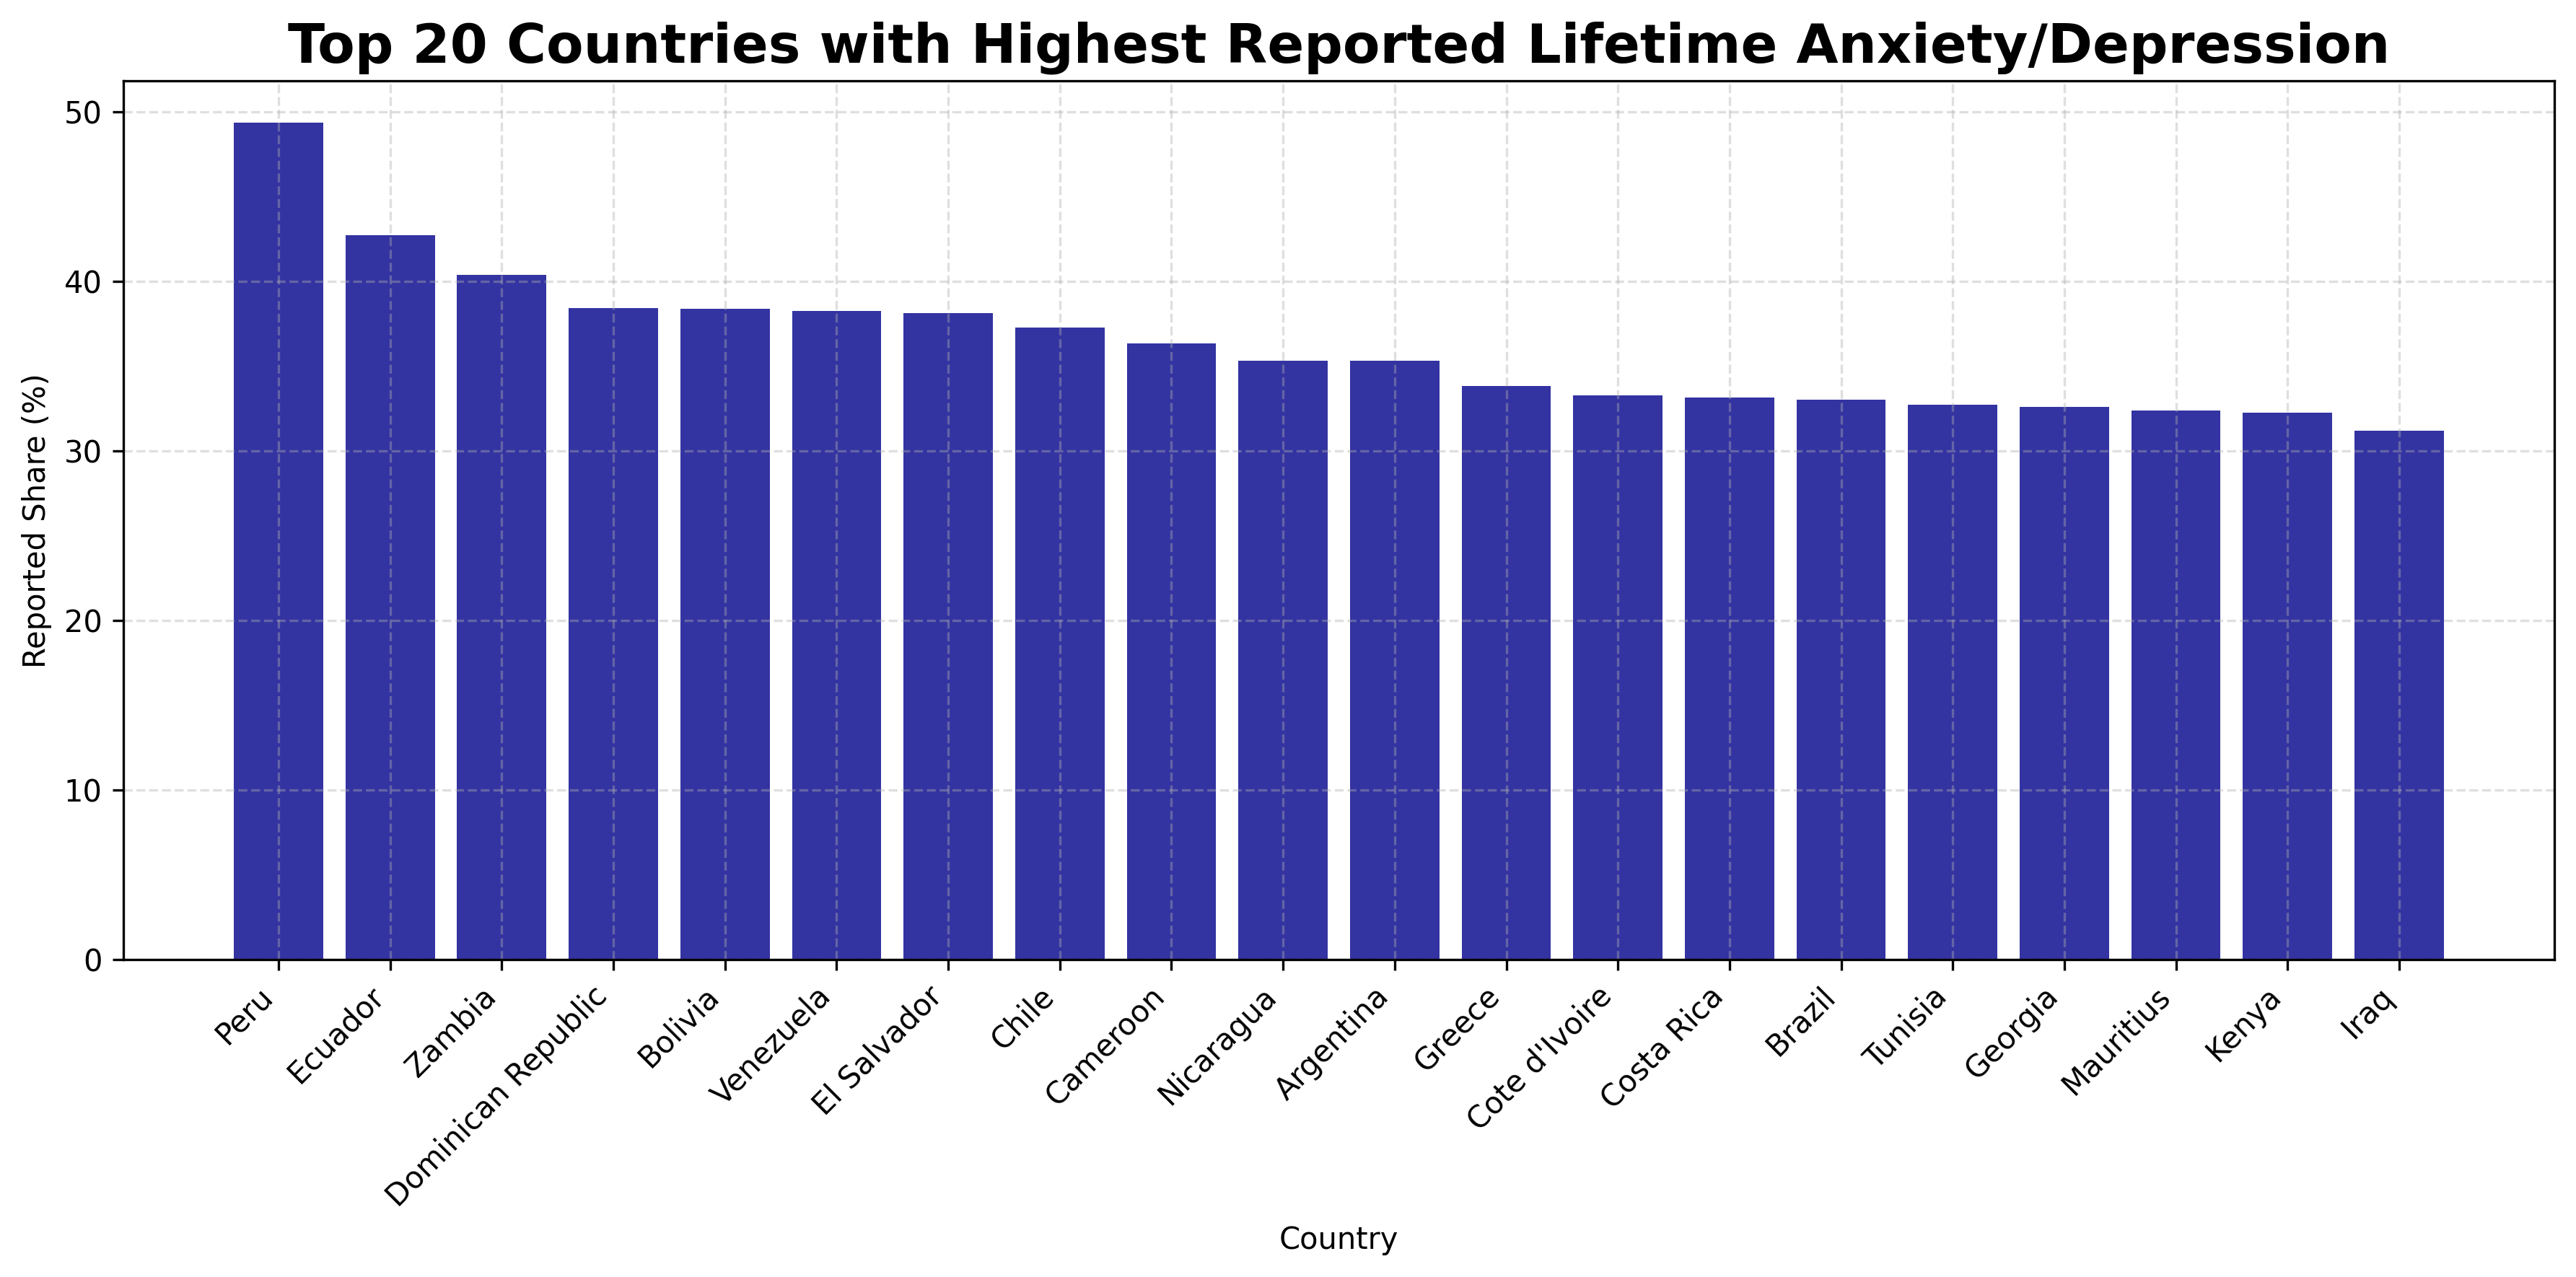

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
top_20 = df.sort_values("Share", ascending=False).head(20)

plt.figure(figsize=(12, 6), dpi=300)
plt.bar(top_20["Entity"], top_20["Share"], color="darkblue", alpha=0.8)
plt.title("Top 20 Countries with Highest Reported Lifetime Anxiety/Depression", fontsize=18, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Reported Share (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


### 📊 (B) Share Distribution Histogram KDE

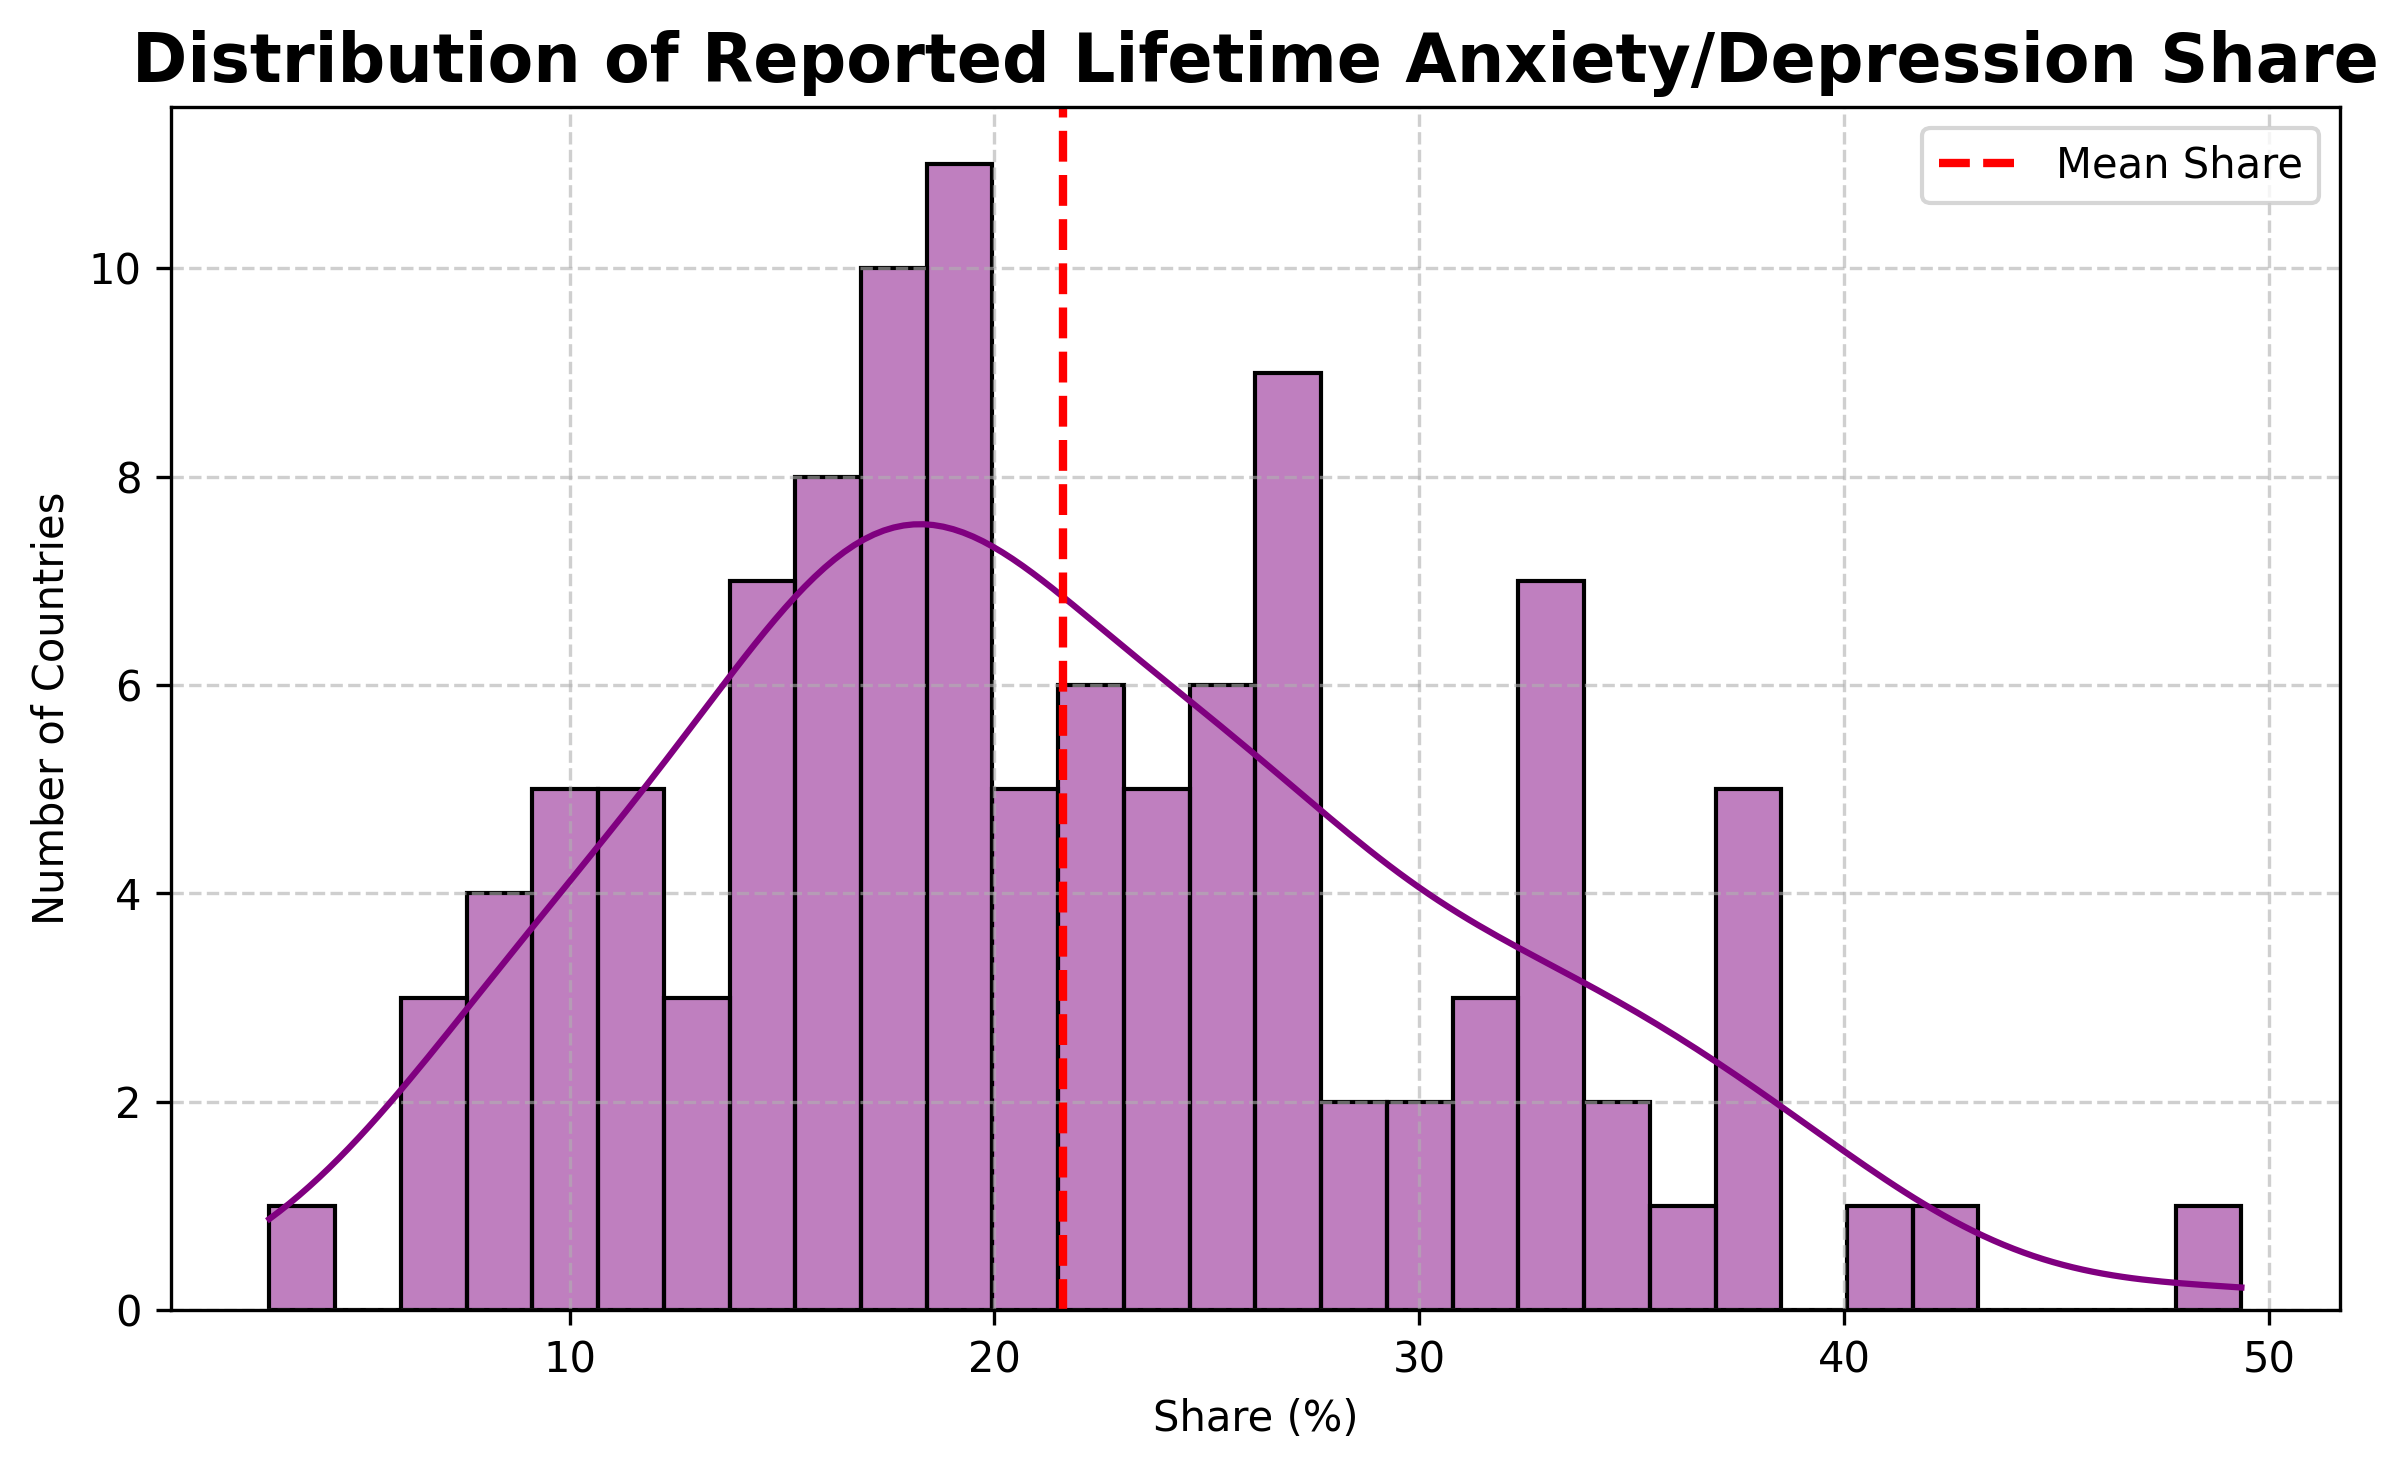

In [ ]:
plt.figure(figsize=(8, 5), dpi=300)
sns.histplot(df["Share"], bins=30, kde=True, color="purple")
plt.axvline(df["Share"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean Share")
plt.title("Distribution of Reported Lifetime Anxiety/Depression Share", fontsize=16, fontweight='bold')
plt.xlabel("Share (%)")
plt.ylabel("Number of Countries")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 📊 (C) Correlation Heatmap

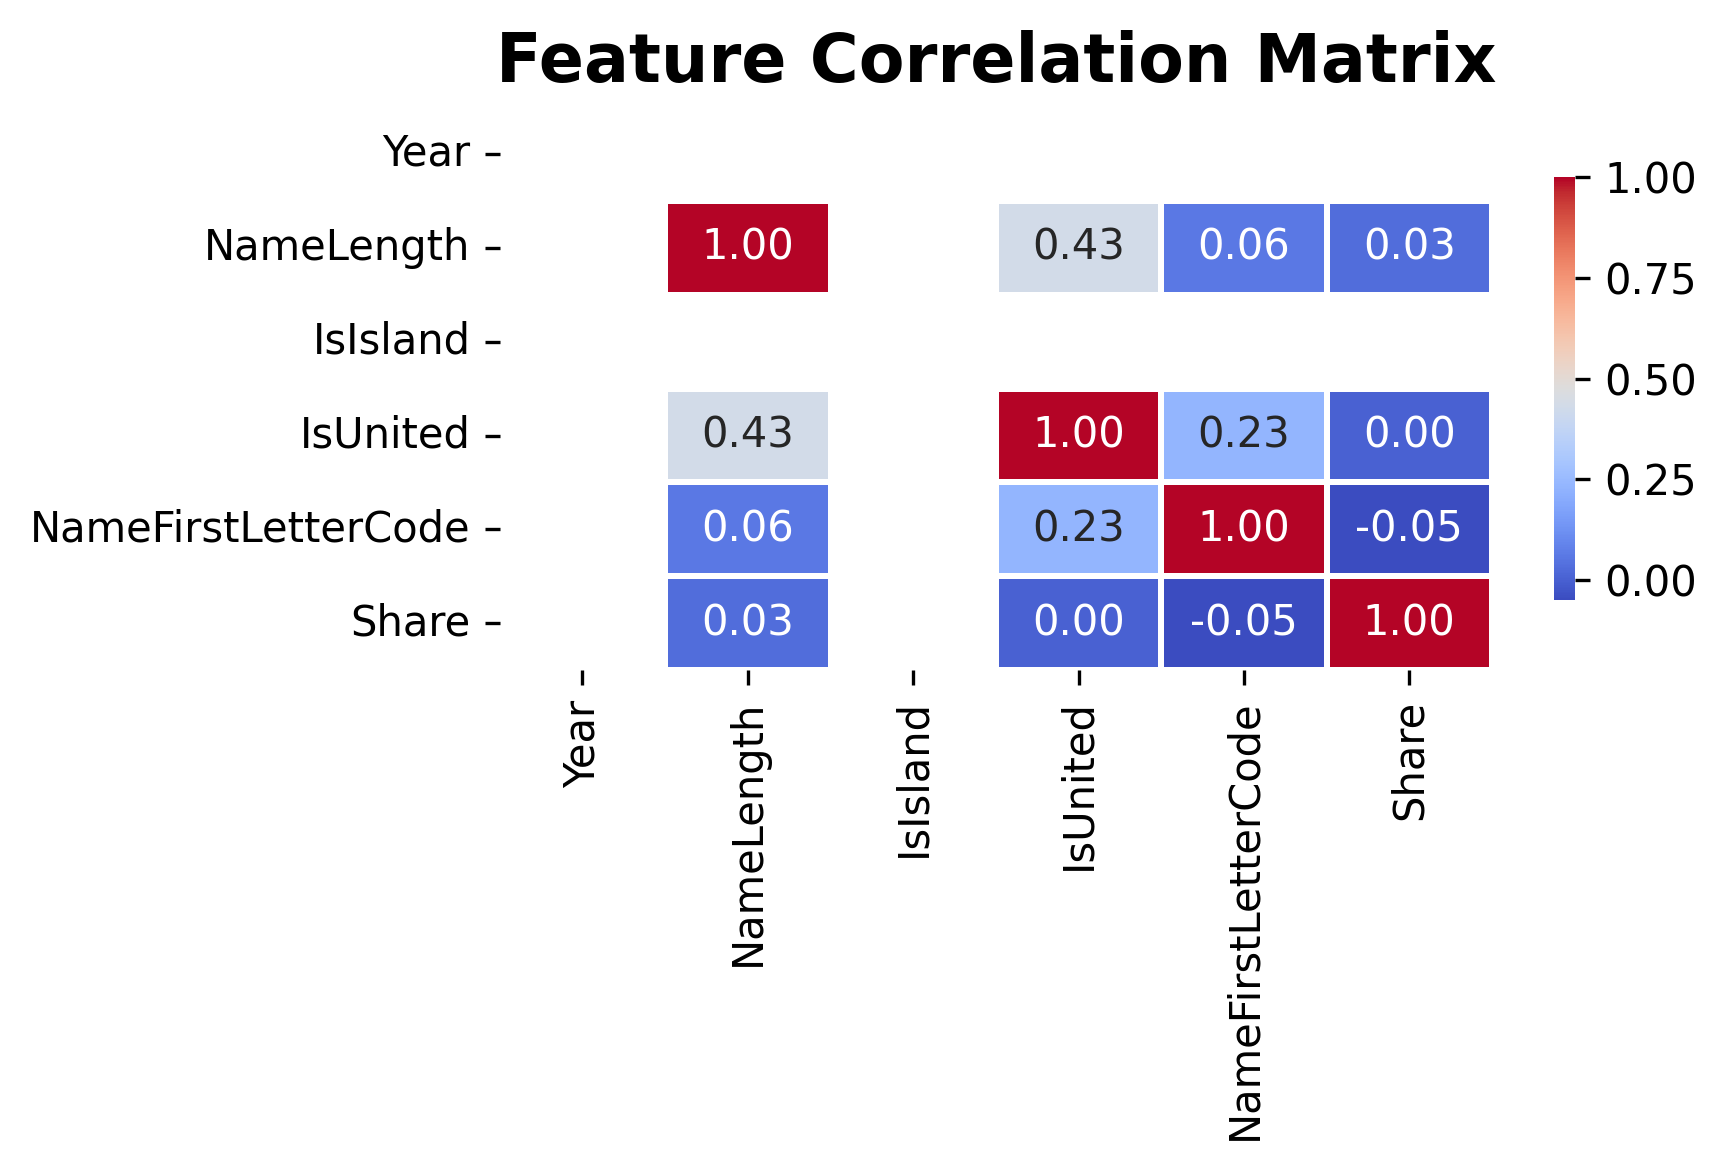

In [ ]:
# Correlation Heatmap for WHO country-level data
num_df = df[["Year", "NameLength", "IsIsland", "IsUnited", "NameFirstLetterCode", "Share"]]
plt.figure(figsize=(6, 4), dpi=300)
sns.heatmap(
    num_df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=1,
    cbar_kws={'shrink': 0.75}
)
plt.title("Feature Correlation Matrix", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


## 📌 5. AutoML Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Index Levels:", df.index.nlevels)
df = df.reset_index(drop=True)
print("First few rows:\n", df.head())
print("\nUpdated DataFrame Columns:", df.columns)

# ------ Step 5.1: definition X and y ------
feature_cols = ["Year", "NameLength", "IsIsland", "IsUnited", "NameFirstLetterCode"]
X = df[feature_cols]
y = df["Share"]

# ------ Step 5.2: Split the training/test set ------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------ Step 5.3:Train linear regression------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# ------ Step 5.4: Train random forest regression------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ------ Step 5.5: Evaluation ------
def print_metrics(name, y_true, y_pred):
    print(f"\n📊 {name} Performance:")
    print(f"MAE  = {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE = {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²   = {r2_score(y_true, y_pred):.3f}")

print_metrics("Linear Regression", y_test, y_pred_lr)
print_metrics("Random Forest", y_test, y_pred_rf)


Index Levels: 1
First few rows:
    index     Entity Code  Year      Share  Entity_len  Code_ord  is_O_code  \
0      0    Albania  ALB  2020  12.326020           7        65          0   
1      1    Algeria  DZA  2020   7.659035           7        68          0   
2      2  Argentina  ARG  2020  35.316630           9        65          0   
3      3  Australia  AUS  2020  27.257576           9        65          0   
4      4    Austria  AUT  2020  15.339011           7        65          0   

   NameLength  IsIsland  IsUnited  NameFirstLetterCode  
0           7         0         0                    0  
1           7         0         0                    0  
2           9         0         0                    0  
3           9         0         0                    0  
4           7         0         0                    0  

Updated DataFrame Columns: Index(['index', 'Entity', 'Code', 'Year', 'Share', 'Entity_len', 'Code_ord',
       'is_O_code', 'NameLength', 'IsIsland', 'IsUn

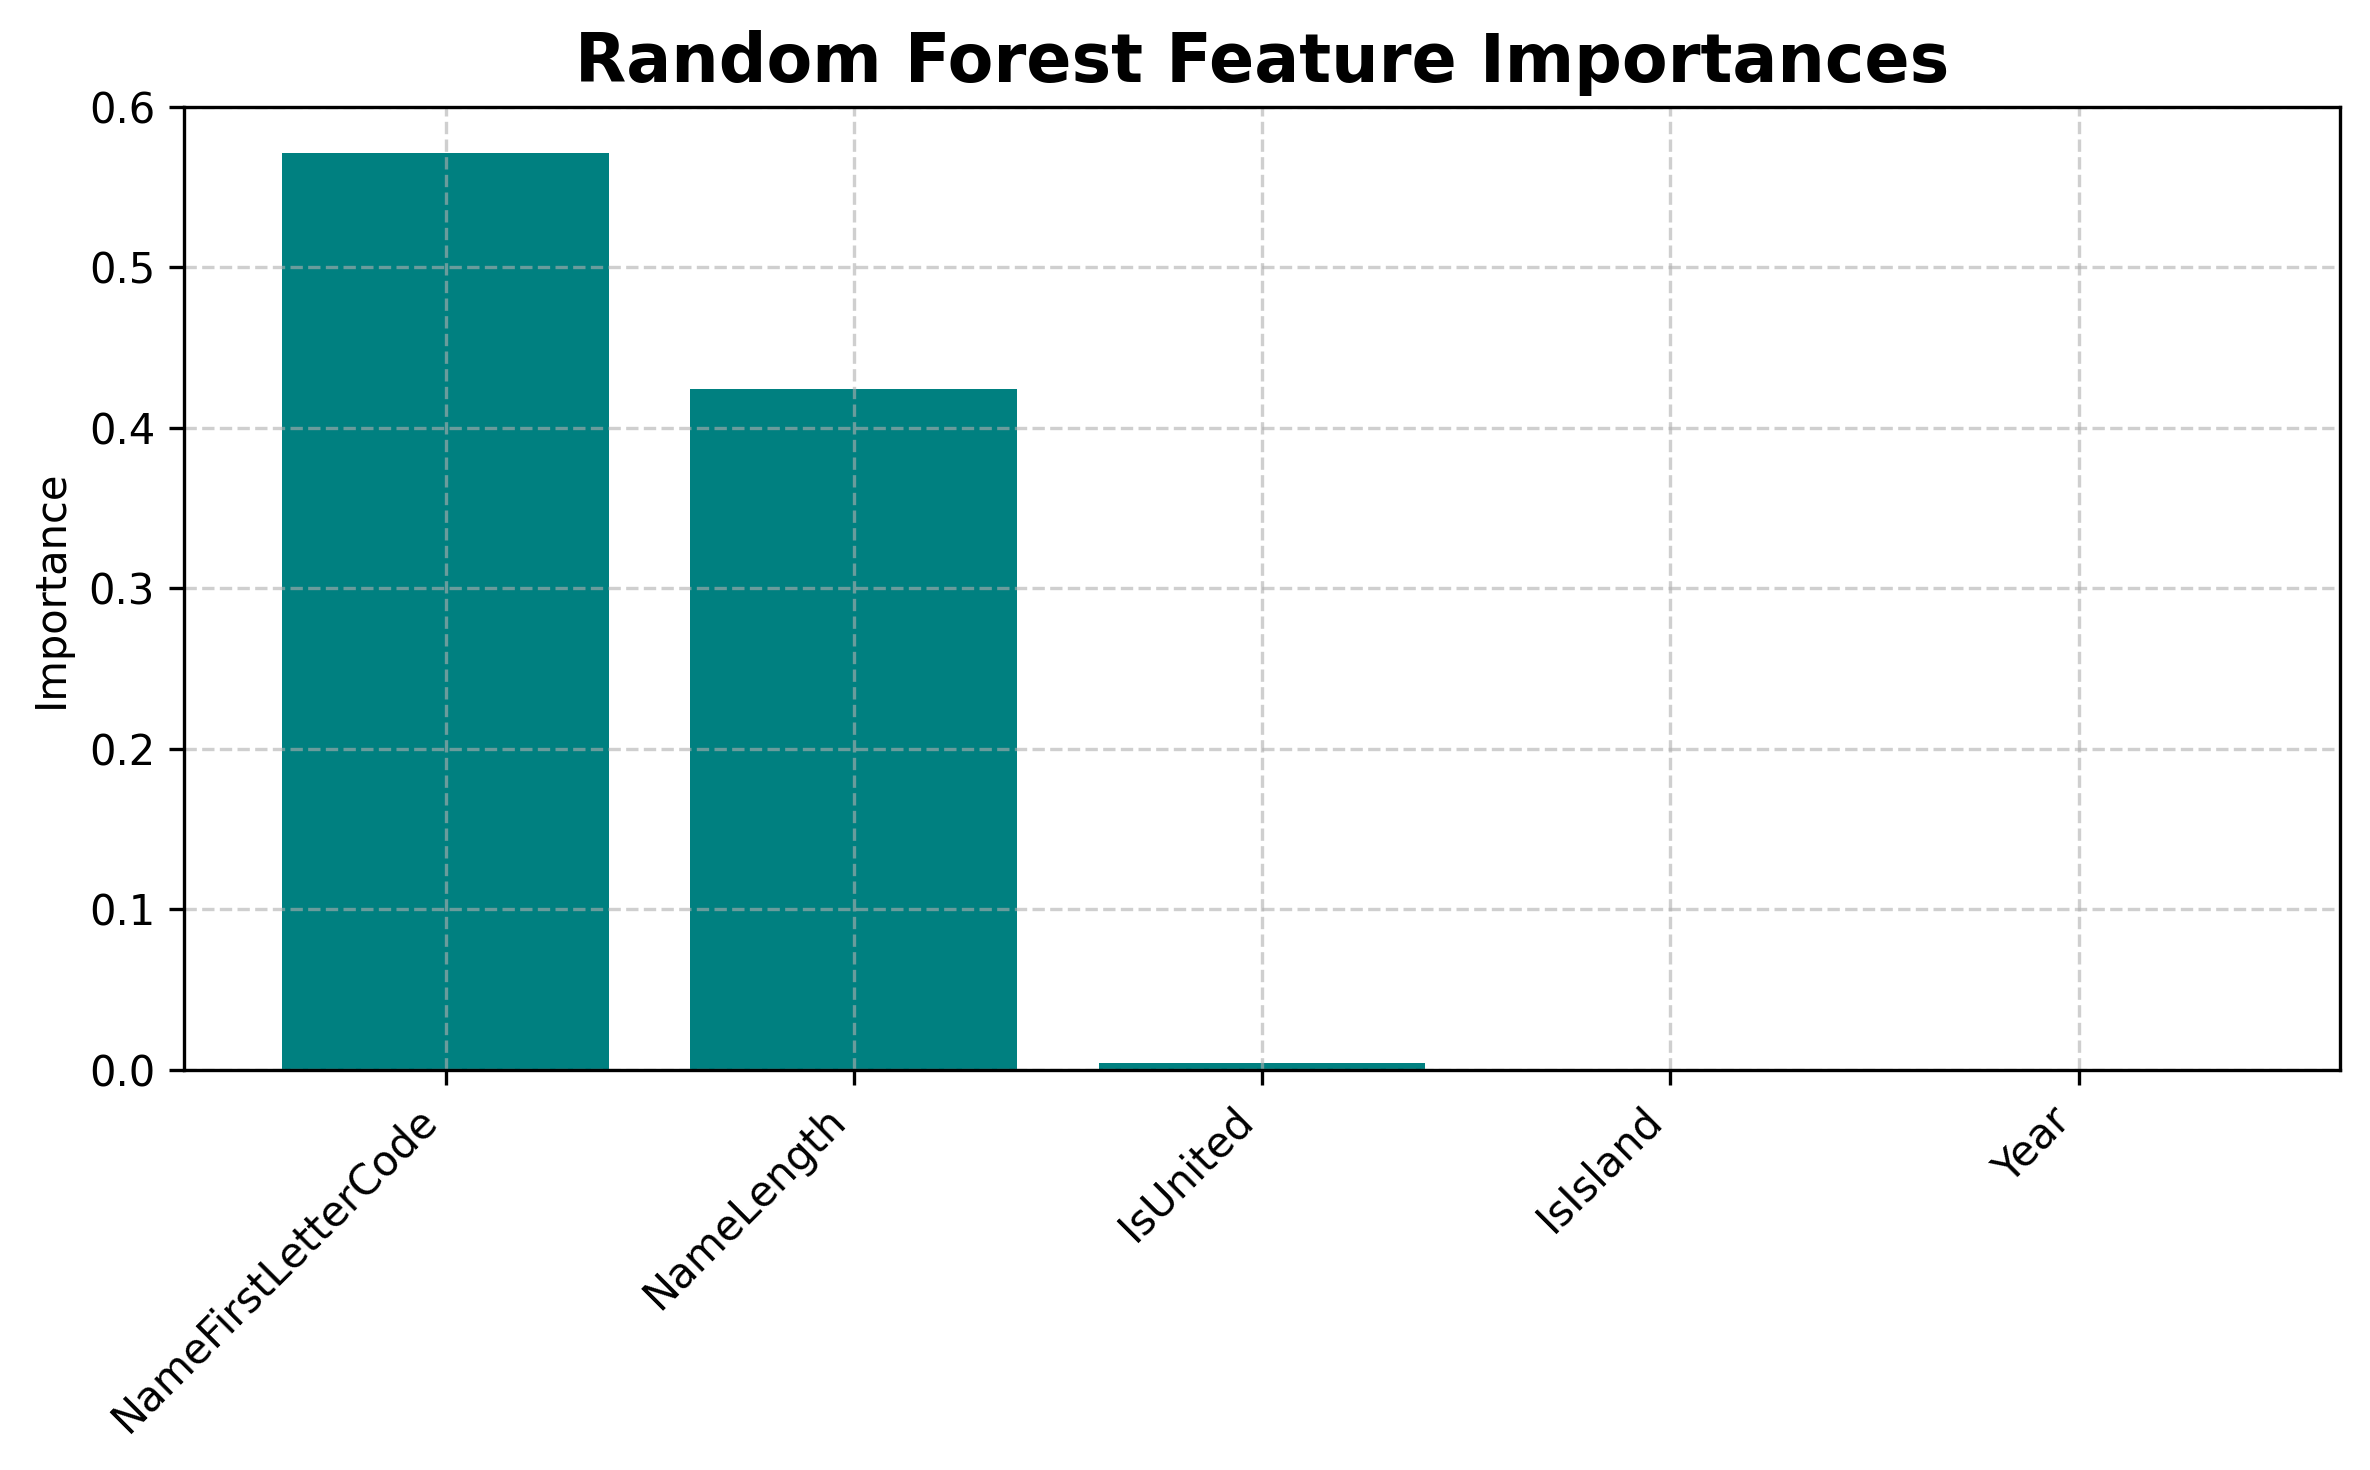

In [ ]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5), dpi=300)
plt.bar(range(X.shape[1]), importances[indices], align='center', color="teal")
plt.xticks(range(X.shape[1]), [feature_cols[i] for i in indices], rotation=45, ha="right")
plt.title("Random Forest Feature Importances", fontsize=16, fontweight='bold')
plt.ylabel("Importance")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Rename columns to remove unwanted underscores and ensure compatibility
df.rename(columns={
    'Date_': 'Date',
    'Price_AAPL': 'Price',
    'Daily Return_': 'Daily Return',
    'MA_10_': 'MA_10',
    'MA_50_': 'MA_50',
    'Lagged_Return_': 'Lagged_Return'
}, inplace=True)

# Print final DataFrame structure before running PyCaret
print("\nFinal DataFrame Columns:", df.columns)



Final DataFrame Columns: Index(['index', 'Entity', 'Code', 'Year', 'Share', 'Entity_len', 'Code_ord',
       'is_O_code', 'NameLength', 'IsIsland', 'IsUnited',
       'NameFirstLetterCode'],
      dtype='object')


In [ ]:
# Install
# Install FLAML (fast lightweight AutoML)
%pip install -q flaml

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
if not hasattr(np, "NaN"):
    np.NaN = np.nan

from flaml import AutoML




In [ ]:
feature_cols = ["Year", "NameLength", "IsIsland", "IsUnited", "NameFirstLetterCode"]
X = df[feature_cols]
y = df["Share"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
automl = AutoML()

automl.fit(
    X_train, y_train,
    task="regression",
    time_budget=60,
    metric="r2",
    seed=42,
    verbose=1
)

print("✅ Best estimator:", automl.best_estimator)
print("✅ Best R2 (validation):", 1 - automl.best_loss if automl.best_loss is not None else "N/A")
print("✅ Best config:", automl.best_config)

y_pred = automl.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Test MAE:  {mae:.4f}")
print(f"📊 Test RMSE: {rmse:.4f}")
print(f"📊 Test R²:   {r2:.4f}")


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


✅ Best estimator: xgboost
✅ Best R2 (validation): -0.05232743036962395
✅ Best config: {'n_estimators': 4, 'max_leaves': 8, 'min_child_weight': np.float64(4.248839714796129), 'learning_rate': np.float64(0.12164444613071333), 'subsample': np.float64(0.9194568075941549), 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': np.float64(0.004598769132636825), 'reg_lambda': np.float64(0.48184351714817575)}

📊 Test MAE:  7.7750
📊 Test RMSE: 8.9679
📊 Test R²:   -0.1260
